In [1]:
import pvdeg
import os

## UV Preconditioning Test (MQT 10)

The following UV preconditoning test (MQT 10) specified in IEC-61215. The test requires irradiance between 280 nm and 400 nm does not exceed 250 $\frac{w}{m^2}$. Significantly, we need to accumulate 15 $\frac{kWh}{m^2}$ over the duration of the test.  

If we set the irradiance to 250 $\frac{w}{m^2}$ it will take 60 hours to reach 15 $\frac{kWh}{m^2}$. Our setpoints file will contain one row with a 3600 minute long timestep.

In [ ]:
path = os.path.join(pvdeg.CHAMBER_DIR, "IEC-61215-MQT-10.csv")

mqt_10 = pvdeg.Chamber(fp=path, setpoint_names=["temperature", "irradiance_280-400"], skiprows=[1])

In [ ]:
mqt_10.setpoints.head(5)

In [ ]:
mqt_10.plot_setpoints()

## Thermal Cycling Test (MQT 11)

This test uses the thermal and voltage cycling test specified in IEC-61215. Currently, voltage is not used for any of the chamber test calculations by pvdeg. It is just included in the csv for the sake of completeness. 

*THE VOLTAGE SETPOINTS ARE WRONG, THE CURVE SHOULD BE SHIFTED BCK, SEE IEC-61215*

In [13]:
path = os.path.join(pvdeg.CHAMBER_DIR, "IEC-61215-MQT-11.csv")

mqt_11 = pvdeg.Chamber(
    fp=path,
    setpoint_names=["temperature","voltage"],
    skiprows=[1],
)

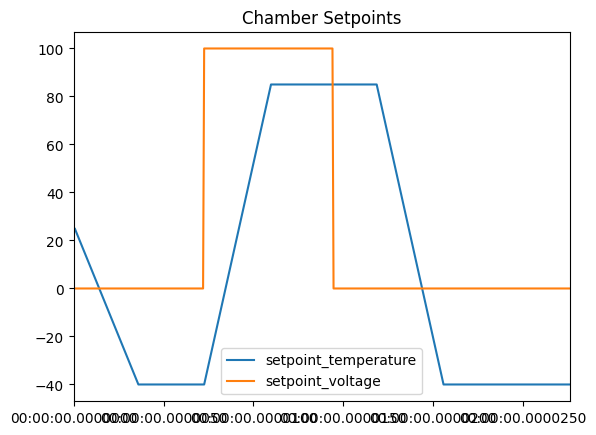

In [10]:
mqt_11.plot_setpoints()

## Damp Heat Test (MQT 13)

This test is defined in IEC-61215. It is an $85 \degree C$, 85% relative humidity test for 1000 hours.

In [11]:
path = os.path.join(pvdeg.CHAMBER_DIR, "IEC-61215-MQT-13.csv")

mqt_13 = pvdeg.Chamber(
    fp=path,
    setpoint_names=["temperature", "relative_humidity"],
    skiprows=[1]
)

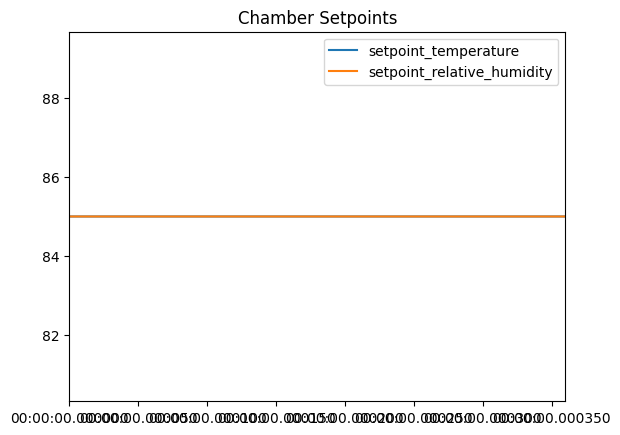

In [12]:
mqt_13.plot_setpoints()

## Thermal Cycling including UV - TC + UV - IEC 63556

IEC 61215-2 MQT 11 combined with IEC 61215-2 MQT 10. This just has the temperature setpoints of MQT 11 with the irradiance turned on at 1600 $\frac{w}{m^2}$ when the temperature is above $0 \degree C$. The times the irradiance is turned on are shown in yellow on the plot below.

*WHAT HAPPENS WITH RH HERE, WE CANT CALCULATE because no RH SETPOINTS IN THE CHAMBER*

In [39]:
path = os.path.join(pvdeg.CHAMBER_DIR, "IEC-61215-MQT-11.csv")

processing = pvdeg.Chamber(
    fp=path,
    setpoint_names=["temperature"],
    skiprows=[1],
)

processing.setpoints["setpoint_irradiance_full"] = processing.setpoints["setpoint_temperature"].apply(lambda x: 1600 if x > 0 else 0)
processing.setpoints["setpoint_relative_humidity"] = 


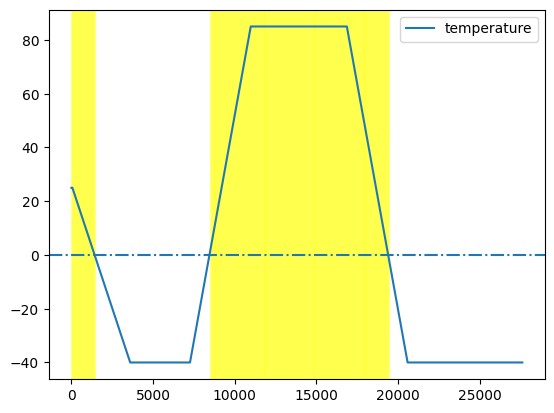

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# irradiance = processing.setpoints["setpoint_irradiance_full"]
temperature = processing.setpoints["setpoint_temperature"]

# ax.plot(irradiance, label="full spectrum irradiance")
ax.plot(temperature, label="temperature")

ax.axhline(y = 0, linestyle="-.")
for idx, value in processing.setpoints["setpoint_irradiance_full"].items():
    if value > 200:
        ax.axvspan(idx.total_seconds(), idx.total_seconds() + 60, color='yellow', alpha=0.3)

plt.legend()
uv_tc = processing